## Task 1 - Data Collection

Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.

## Loading Libraries

In [1]:
# import libraries
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Step-by-step Objectives:

• Gain a thorough understanding of the data collection process, specifically web scraping and importing data from various sources.

• Acquire knowledge about the data cleaning and manipulation process.

• Develop data wrangling skills and build data intuition.

• Learn how to formulate relevant questions and effectively find answers.

• Enhance visualization skills by utilizing open-source libraries in Python.

• Generate valuable insights from analysis.

• Practice writing reports to effectively communicate findings. 

## A - NCDC Website scrap

Website - https://covid19.ncdc.gov.ng/ it contains data with the following:

• States Affected

• No. of Cases (Lab Confirmed)

• No. of Cases (on admission)

• No. Discharged

• No. of Deaths

In [2]:
pip install lxml

In [3]:
# Extraction of ncdc html data from the website given is not accessible as they are restrictions.

# using the covidnig.csv provided in the starter notebook

# covert to raw file

url = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv"

In [4]:
ncdc = pd.read_csv(url)

In [5]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## B - John Hopkins Data Repository
The Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) publishes daily data on confirmed, death and recovered cases across different countries.

Here data from the John Hopkins repository will be obtained. The task here involves saving the data from the GitHub repo link below to DataFrame for further analysis.

• Global Daily Confirmed Cases -Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

• Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)

• Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [6]:
# obtain file from github link and convert to raw file
# load data and save to dataframe

# confirmed cases
# convert to raw data
time_series_covid19_confirmed_global = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
jhopkins_global_confirmed = pd.read_csv(time_series_covid19_confirmed_global)


In [7]:
jhopkins_global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [8]:
# recovered cases
time_series_covid19_recovered_global = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
jhopkins_global_recovered = pd.read_csv(time_series_covid19_recovered_global)


In [9]:
jhopkins_global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# death cases
time_series_covid19_deaths_global = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
jhopkins_global_deaths = pd.read_csv(time_series_covid19_deaths_global)

In [11]:
jhopkins_global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## C - External Data

External data gotten from other sources are imported as well to help our analysis

In [12]:
# loading external data 
real_gdp_data = pd.read_csv('RealGDP.csv', index_col=False)

covid_external_data = pd.read_csv('covid_external.csv', index_col=False)

budget_data = pd.read_csv('Budget data.csv', index_col=False)

## Task 2 - View the data

Obtain basic information about the data using the head() and info() method.

### NCDC DATA

In [13]:
ncdc

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [14]:
ncdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


### We can ascertain that there are no null values in the ncdc data which is extracted from the given source.

In [15]:
ncdc.describe()

,No. of Deaths
count,37.000000
mean,33.000000
std,41.797794
min,2.000000
25%,11.000000
50%,21.000000
75%,36.000000
max,236.000000


Average number of covid 19 deaths across all states in Nigeria is 33

Highest number of deaths recorded in a state is 236 and minimum is 2.

75% of cases result into 36 deaths & 25% of cases result into 11 deaths.

In [16]:
ncdc.shape

(37, 5)

The data has 37 rows and 5 columns in total

In [17]:
ncdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format.
We would just do some changes to the data below; 

•Convert to appropriate data type.

•Rename the columns of the scraped data.

•Remove comma(,) in numerical data

•Extract daily data for Nigeria from the Global dataset

In [18]:
ncdc.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [19]:
#Rename columns
ncdc.rename(columns={'States Affected': 'States', 
                        'No. of Cases (Lab Confirmed)': 'Confirmed cases',
                        'No. of Cases (on admission)': 'Admitted cases',
                        'No. Discharged':'Recovered cases',
                        'No. of Deaths':'Death'}, inplace= True)

In [20]:
# Remove comma(,) in numerical data
# define the columns containing numerical data with commas
cols_to_convert = ['Confirmed cases', 'Admitted cases', 'Recovered cases', 'Death']


In [21]:
# replace commas with empty strings in the specified columns
for col in cols_to_convert:
    ncdc[col] = ncdc[col].replace(',', '', regex=True)

In [22]:
# convert the columns to numeric values
ncdc[cols_to_convert] = ncdc[cols_to_convert].apply(pd.to_numeric, errors='coerce')

### Extracting John Hopkins Repository for a daily overview

In [23]:
# Most of the Province/State feature enteries are null, not important and will be dropped for our analysis, since we need only country (Nigeria)
jhopkins_global_confirmed.drop('Province/State',axis=1,inplace=True)
jhopkins_global_recovered.drop('Province/State',axis=1,inplace=True)
jhopkins_global_deaths.drop('Province/State',axis=1,inplace=True)

In [24]:
# rename the john hopkins data
# For confirmed
jhopkins_global_confirmed.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_confirmed = jhopkins_global_confirmed[jhopkins_global_confirmed["Country"] == "Nigeria"]

In [25]:
nigeria_confirmed

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [26]:
# for recovered
jhopkins_global_recovered.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_recovered = jhopkins_global_recovered[jhopkins_global_recovered["Country"] == "Nigeria"]

In [27]:
nigeria_recovered

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# For deaths
jhopkins_global_deaths.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_deaths = jhopkins_global_deaths[jhopkins_global_deaths["Country"] == "Nigeria"]


In [29]:
nigeria_deaths

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [30]:
# Creating the global Nigeria data for Date and Cases
# Confirmed cases
columns = nigeria_confirmed.iloc[:, 4:]

df_nigeria_confirmed = nigeria_confirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_confirmed["Date"] = df_nigeria_confirmed["Date"].apply(pd.to_datetime, errors='coerce')

In [31]:
df_nigeria_confirmed.tail(3)

,Date,Cases
1139,2023-03-07,266598
1140,2023-03-08,266598
1141,2023-03-09,266598


In [32]:
# Recovered Cases
columns = nigeria_recovered.iloc[:, 4:]

df_nigeria_recovered = nigeria_recovered.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_recovered["Date"] = df_nigeria_recovered["Date"].apply(pd.to_datetime, errors='coerce')

In [33]:
df_nigeria_recovered.tail(3)

,Date,Cases
1139,2023-03-07,0
1140,2023-03-08,0
1141,2023-03-09,0


In [34]:
# Death Cases
columns = nigeria_deaths.iloc[:, 4:]

df_nigeria_deaths = nigeria_deaths.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_deaths["Date"] = df_nigeria_deaths["Date"].apply(pd.to_datetime, errors='coerce')

In [35]:
df_nigeria_deaths.tail(3)

,Date,Cases
1139,2023-03-07,3155
1140,2023-03-08,3155
1141,2023-03-09,3155


## ANALYSIS

#### Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [36]:
ncdc_confirm10 = ncdc.sort_values(by=['Confirmed cases'], ascending=False).head(10)

In [37]:
ncdc_confirm10

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


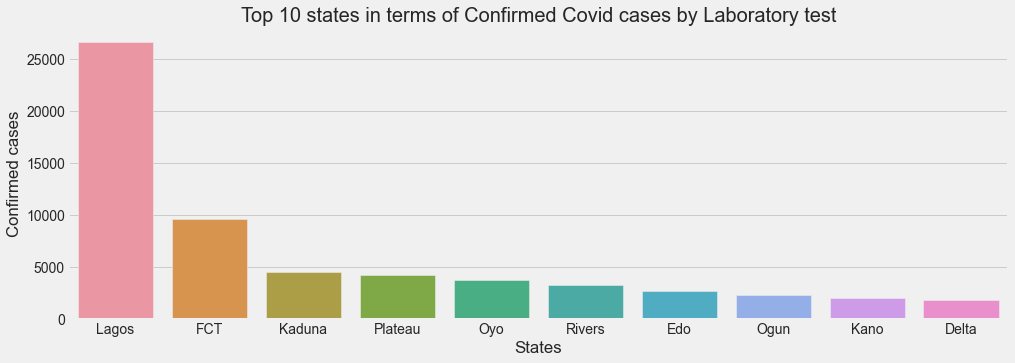

In [38]:
# Plot the bar chart
plt.figure(figsize=(15,5))
sns.barplot(x='States', y='Confirmed cases', data=ncdc_confirm10)
plt.title("Top 10 states in terms of Confirmed Covid cases by Laboratory test", fontdict={'fontsize': 20})
plt.show()

##### The top 10 states with the highest number of confirmed cases are Lagos with 26780 cases, FCT with 9627 cases, Kaduna with 4504 cases, Plateau  with 4262 cases, Oyo with 3788 cases, Rivers with 3279 cases, Edo with 2768 cases, Ogun with 2382 cases, Kano with 2032 cases, and Delta with 1843 cases.

#### Generate a plot that shows the Top 10 states in terms of Discharged Covid cases by Laboratory test

In [39]:
ncdc_recovered10 = ncdc.sort_values(by=['Recovered cases'], ascending=False).head(10)

In [40]:
ncdc_recovered10

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


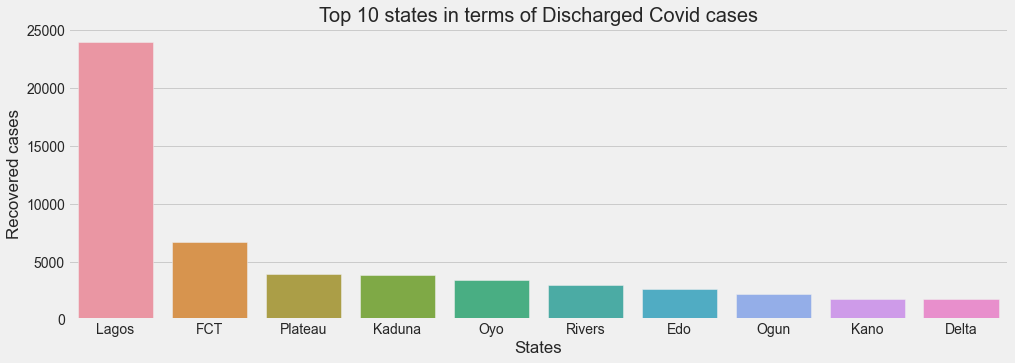

In [41]:
# Plot the bar chart
plt.figure(figsize=(15,5))
sns.barplot(x='States', y='Recovered cases', data=ncdc_recovered10)
plt.title("Top 10 states in terms of Discharged Covid cases", fontdict={'fontsize': 20})
plt.show()

###### The top 10 states with the highest number of Recovered cases are Lagos with 24307 cases, FCT with 6694 cases, Plateau with 3948 cases, Kaduna with 3877 cases, Oyo with 3374 cases, Rivers with 2987 cases, Edo with 2603 cases, Ogun with 2175 cases, Kano with 1778 cases, and Delta with 1737 cases.

#### Plot the top 10 Death cases

In [42]:
ncdc_death10 = ncdc.sort_values(by=['Death'], ascending=False).head(10)

In [43]:
ncdc_death10

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


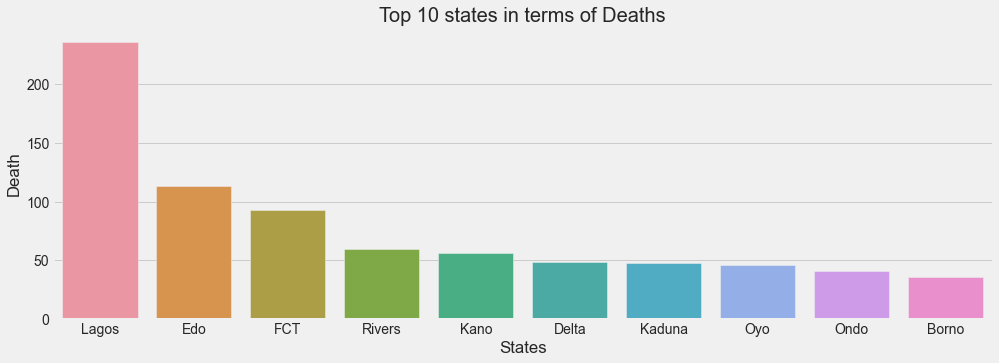

In [44]:
# Plot the bar chart
plt.figure(figsize=(15,5))
sns.barplot(x='States', y='Death', data=ncdc_death10)
plt.title("Top 10 states in terms of Deaths", fontdict={'fontsize': 20})
plt.show()

##### The top 10 states with the highest number of Death cases are Lagos with 236 cases, Edo with 113 cases, FCT with 93 cases, Rivers with 60 cases, Kano with 56 cases, Delta with 49 cases, Kaduna with 48 cases, Oyo with 46 cases, Ondo with 41 cases, and Borno with 36 cases.

## Other Bivariate Analysis:

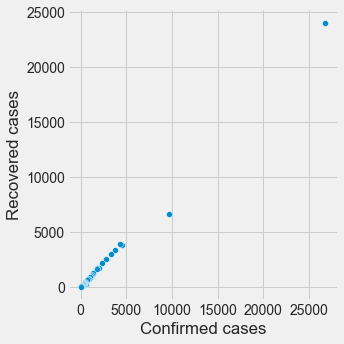

In [45]:
sns.relplot(data = ncdc, x ='Confirmed cases', y = 'Recovered cases')

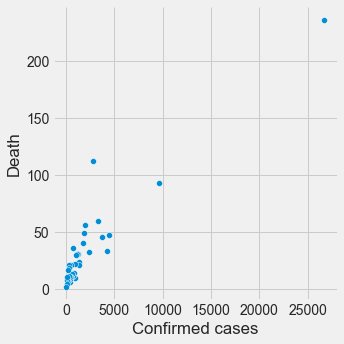

In [46]:
sns.relplot(data = ncdc, x = 'Confirmed cases', y='Death')

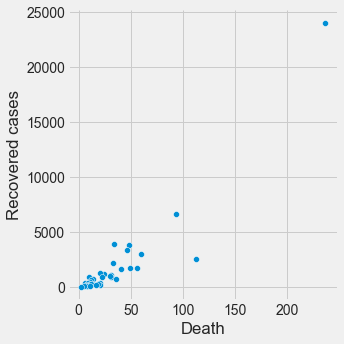

In [47]:
sns.relplot(data=ncdc,x='Death',y='Recovered cases')

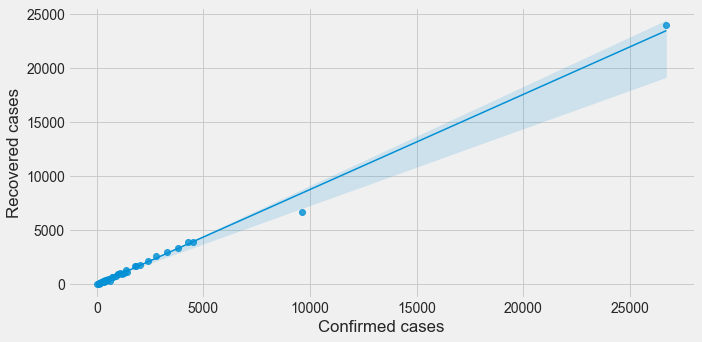

In [48]:
plt.figure(figsize=(10,5))
p=sns.regplot(data=ncdc,x='Confirmed cases',y='Recovered cases')
plt.setp(p.lines, linewidth=1.5) 
plt.show()

<AxesSubplot:>

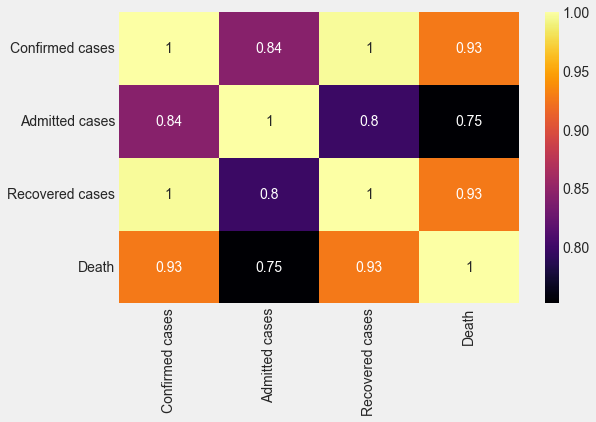

In [49]:
plt.figure(figsize=(8,5))
sns.heatmap(ncdc.corr(), annot = True, cmap = 'inferno')

<AxesSubplot:>

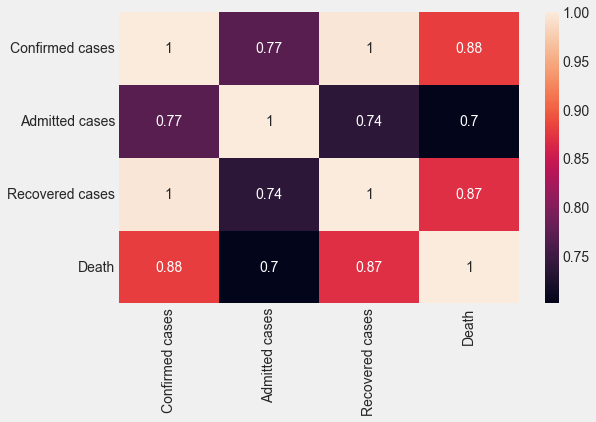

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(ncdc.corr(method='spearman'),annot=True)

##### This shows that there is high correlation between the Confirmed cases, Recovered cases and the Death cases

<AxesSubplot:xlabel='Death', ylabel='Recovered cases'>

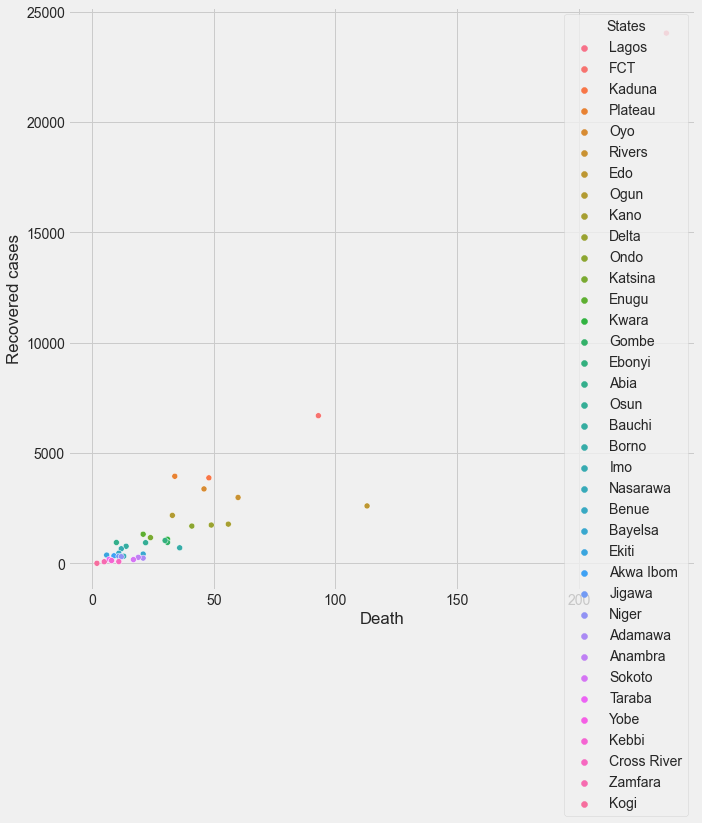

In [51]:
# Scatter plot showing the relation btw (correlation) number of cases, and number of discharge based on diverse state across the nature

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(data=ncdc, x ='Death',y ='Recovered cases', hue= 'States',ax=ax)

### Univariate Analysis:

<AxesSubplot:xlabel='Confirmed cases', ylabel='Density'>

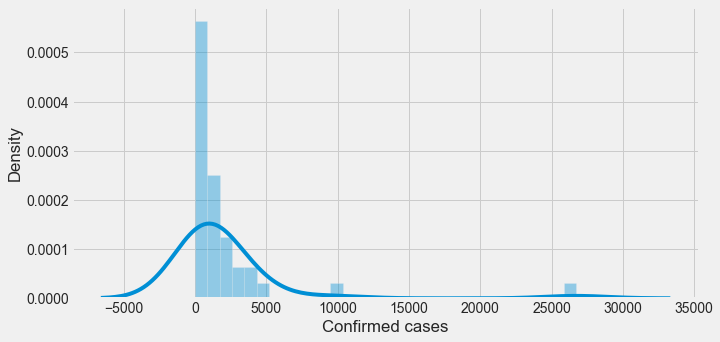

In [52]:
fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(ncdc['Confirmed cases'])

<AxesSubplot:xlabel='Recovered cases', ylabel='Density'>

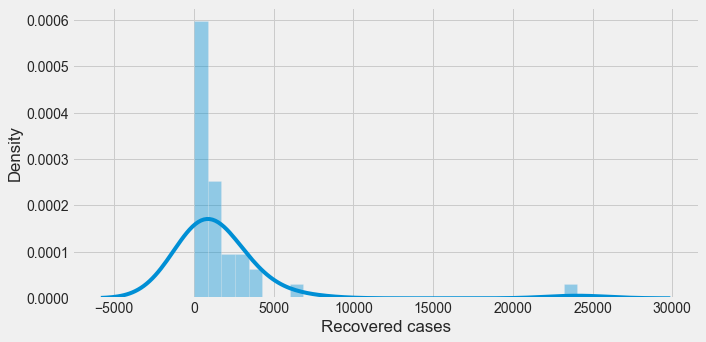

In [53]:
fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(ncdc['Recovered cases'])

<AxesSubplot:xlabel='Death', ylabel='Density'>

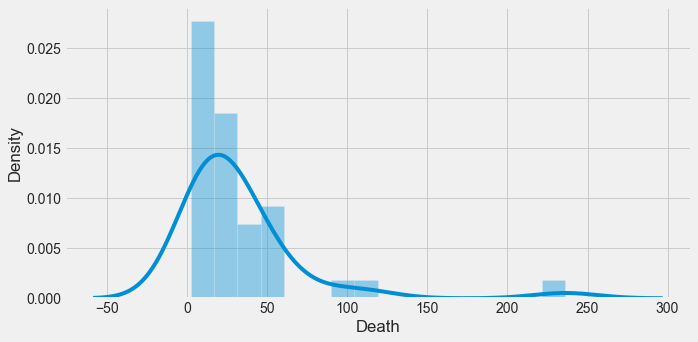

In [54]:
fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(ncdc['Death'])

### Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

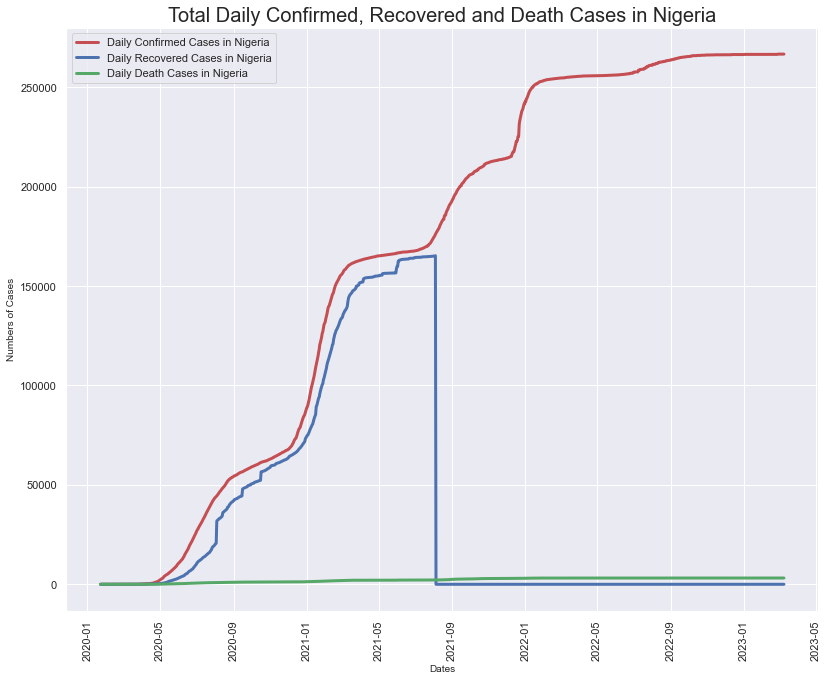

In [55]:
sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(df_nigeria_confirmed.Date, df_nigeria_confirmed.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="r", markers="o")

sns.lineplot(df_nigeria_recovered.Date, df_nigeria_recovered.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="b")

sns.lineplot(df_nigeria_deaths.Date, df_nigeria_deaths.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="g")

#Title, labels and legend
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Numbers of Cases", fontsize=10)
plt.xticks(rotation=90)
plt.title ("Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=20)
plt.show()

##### It can be deduced that some percentage of individuals who tested positive are recuperating.

#### • Determine the daily infection rate, using the Pandas .diff method to find the derivate of the total cases.
#### • Generate a line plot for the above

In [56]:
nigeria_daily_infection_rate = df_nigeria_confirmed.Cases.diff()

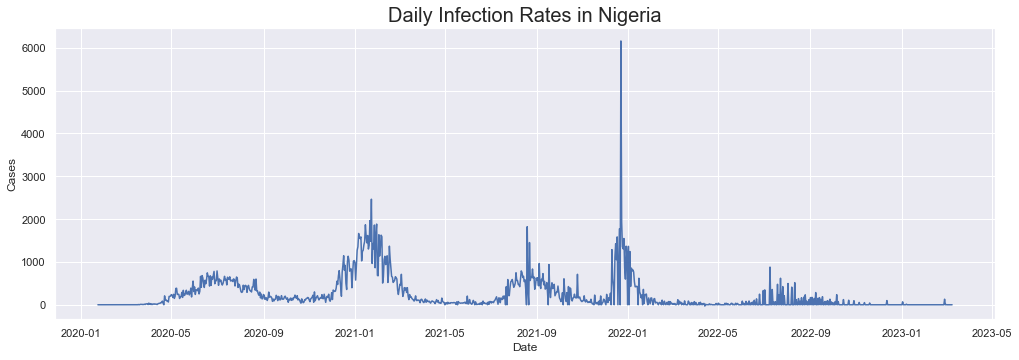

In [57]:
plt.figure(figsize=(15,5))
sns.lineplot(df_nigeria_confirmed.Date, nigeria_daily_infection_rate).set_title("Daily Infection Rates in Nigeria", fontdict = { 'fontsize': 20});

##### There was a huge spike in the infection rate from around September 2021 to January 2022 after which the number of cases have been consolidating.

### Calculate maximum infection rate for a day (Number of new cases)

### Find the date

In [58]:
df_nigeria_confirmed["Daily Infection Rate"] = df_nigeria_confirmed["Cases"].diff()
max_infection = df_nigeria_confirmed["Daily Infection Rate"].max()


In [59]:
max_infection

6158.0

##### The maximum infection rate is 6158.

In [60]:
#Date of maximum infection
max_infection_date = df_nigeria_confirmed.loc[(df_nigeria_confirmed["Daily Infection Rate"] == max_infection), "Date"]

In [61]:
max_infection_date

699   2021-12-22
Name: Date, dtype: datetime64[ns]

##### The date with the maximum infection rate was on the 22nd of December 2021 with an infection rate of 6158.

#### Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 

### Covid External Data (Index Data)

In [62]:
covid_external_data

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [63]:
ncdc

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [64]:
covid_external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   states                  37 non-null     object 
 1   region                  37 non-null     object 
 2   Population              37 non-null     int64  
 3   Overall CCVI Index      37 non-null     float64
 4   Age                     37 non-null     float64
 5   Epidemiological         37 non-null     float64
 6   Fragility               37 non-null     float64
 7   Health System           37 non-null     float64
 8   Population Density      37 non-null     float64
 9   Socio-Economic          37 non-null     float64
 10  Transport Availability  37 non-null     float64
 11  Acute IHR               37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [65]:
covid_external_data.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [66]:
covid_external_data.isnull().sum()

states                    0
region                    0
Population                0
Overall CCVI Index        0
Age                       0
Epidemiological           0
Fragility                 0
Health System             0
Population Density        0
Socio-Economic            0
Transport Availability    0
Acute IHR                 0
dtype: int64

In [67]:
covid_external_data.groupby('region')[covid_external_data.columns].agg('mean').sort_values(by='Overall CCVI Index')

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
region,,,,,,,,,,
South West,7.106167e+06,0.150000,0.616667,0.616667,0.333333,0.333333,0.733333,0.133333,0.300000,1.031667
North Central,4.792000e+06,0.328571,0.314286,0.485714,0.542857,0.414286,0.342857,0.528571,0.514286,0.874286
South South,4.806833e+06,0.416667,0.700000,0.616667,0.400000,0.466667,0.600000,0.316667,0.450000,1.025000
South East,5.430400e+06,0.420000,0.900000,0.720000,0.260000,0.400000,0.860000,0.300000,0.060000,1.098000
North West,7.807857e+06,0.785714,0.214286,0.242857,0.514286,0.642857,0.414286,0.871429,0.757143,0.872857
North East,4.899167e+06,0.883333,0.416667,0.400000,0.916667,0.733333,0.150000,0.766667,0.816667,0.873333


#### SOUTH WEST

• The south west has a very low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that the south west is densely consisting of aged people.

•The Epidemiology of the south west quite shows the high percent of individuals, are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South west has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the south west at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index is also low indicating that low transport capability of the zone.

•The IHR in the south west is high implying that the rights to cross border due to public events is granted more to them.

#### NORTH CENTRAL

•The North Central have a relatively low CCVI but a high fragility index.

•The data from the aging in the North Central is low.

•The Epidemiology in the North Central shows that a moderate percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a good quality level of health care services or professionals.

•The North central has a very low population density.

•The Socio economic index puts the North central at a moderate advantage and disadvantage spot.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North Central is high implying that the rights to cross border due to public events is granted more to them.


#### SOUTH SOUTH

•The South South also has a low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that the south south is densely consisting of aged people.

•The Epidemiology of the South South shows that quite the percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South south has a moderate population density index.

•The Socio economic index puts the south south at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index is also low indicating that low transport capability of the zone

•The IHR in the south west is high implying that the rights to cross border due to public events is granted more to them.


#### SOUTH EAST

•The south east has a very low CCVI and fragility index indicating that most of its state are not so vulnerable to the disease because factors like food insecurity and civil unrest are mininimal.

•The data from the aging index shows that there are more aged people in the south eastern part of Nigeria compared to every other geopolitical state.

•The Epidemology of the south east shows that a large percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates low quality of health care services or professionals.

•The South east has the highest population density and IHR indexes.

•The Socio economic index also puts the south east at a disadvantaged spot relative to other geopolitical zones.

•The Mobility/Transportation index in the south east is the lowest indicating that low transport capability of the zone.

•The IHR in the East is high implying that the rights to cross border due to public events is granted more to them.


#### NORTH WEST

•The North West has a very high CCVI but a mild fragility index status implying high degree of vulnerability.

•The data from the aging in the North West is low.

•The Epidemiology in the North West shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a good quality level of health care services or professionals.

•The North West has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the North West at a huge advantage compared to other zones.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North West is high implying that the rights to cross border due to public events is granted more to them.

#### NORTH EAST

•The North East has the highest CCVI and fragility index status implying high degree of vulnerability.

•The data from the aging in the North East is low.

•The Epidemiology in the North East shows that a small percent of individuals are suffering from vulnerable various diseases (incidence) and the number of people suffering from each condition at any one time (prevalence). Industrial and environmental health problems.

•The health care index indicates a mild quality level of health care services or professionals.

•The North East has a very high population density which could be a very key contributor to the high number of cases confirmed.

•The Socio economic index puts the North East at a huge advantage compared to other zones.

•The Mobility/Transportation index is high indicating a good transport capability of the zone.

•The IHR in the North East is high implying that the rights to cross border due to public events is granted more to them.



### Line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis.

In [68]:
# Merge the two datasets based on the "State" column
data_combined = pd.merge(ncdc, covid_external_data, left_on='States', right_on='states',how='left').drop('states',axis=1)


In [69]:
data_combined

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627,2840,6694,93,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504,579,3877,48,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262,280,3948,34,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788,368,3374,46,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279,232,2987,60,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768,52,2603,113,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382,174,2175,33,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032,198,1778,56,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843,57,1737,49,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


In [70]:
data_combined.shape

(37, 16)

In [71]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   States                  37 non-null     object 
 1   Confirmed cases         37 non-null     int64  
 2   Admitted cases          37 non-null     int64  
 3   Recovered cases         37 non-null     int64  
 4   Death                   37 non-null     int64  
 5   region                  34 non-null     object 
 6   Population              34 non-null     float64
 7   Overall CCVI Index      34 non-null     float64
 8   Age                     34 non-null     float64
 9   Epidemiological         34 non-null     float64
 10  Fragility               34 non-null     float64
 11  Health System           34 non-null     float64
 12  Population Density      34 non-null     float64
 13  Socio-Economic          34 non-null     float64
 14  Transport Availability  34 non-null     floa

In [72]:
data_combined.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,37.000000,37.000000,37.000000,37.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2119.837838,240.810811,1846.027027,33.000000,6.005735e+06,0.502941,0.520588,0.505882,0.476471,0.520588,0.523529,0.488235,0.488235,0.958824
std,4537.417740,595.255773,4009.464785,41.797794,2.663294e+06,0.298973,0.307265,0.302456,0.299554,0.288968,0.299554,0.301275,0.306263,0.102181
min,5.000000,0.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000
25%,381.000000,25.000000,300.000000,11.000000,4.680250e+06,0.300000,0.300000,0.300000,0.225000,0.300000,0.300000,0.225000,0.225000,0.870000
50%,897.000000,57.000000,775.000000,21.000000,5.432000e+06,0.500000,0.550000,0.500000,0.450000,0.500000,0.550000,0.500000,0.450000,0.930000
75%,1843.000000,183.000000,1737.000000,36.000000,6.420250e+06,0.775000,0.800000,0.775000,0.700000,0.775000,0.800000,0.775000,0.775000,1.055000
max,26708.000000,2840.000000,24037.000000,236.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000


In [73]:
data_combined.isnull().sum()

States                    0
Confirmed cases           0
Admitted cases            0
Recovered cases           0
Death                     0
region                    3
Population                3
Overall CCVI Index        3
Age                       3
Epidemiological           3
Fragility                 3
Health System             3
Population Density        3
Socio-Economic            3
Transport Availability    3
Acute IHR                 3
dtype: int64

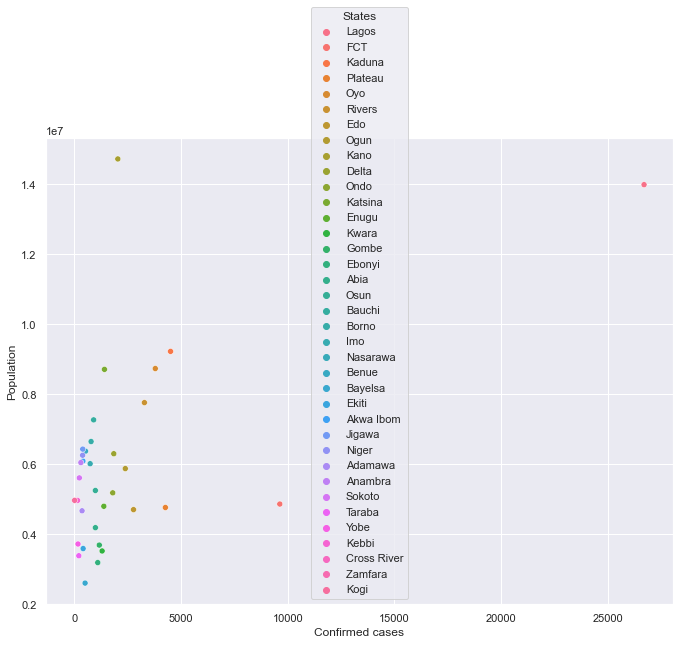

In [75]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x='Confirmed cases',y='Population',hue='States',data=data_combined)
plt.savefig('pop vs confirmed')

In [76]:
n_largest_data=data_combined.nlargest(10,'Confirmed cases')

In [77]:
n_largest_data

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627,2840,6694,93,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504,579,3877,48,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262,280,3948,34,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788,368,3374,46,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279,232,2987,60,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768,52,2603,113,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382,174,2175,33,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032,198,1778,56,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843,57,1737,49,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


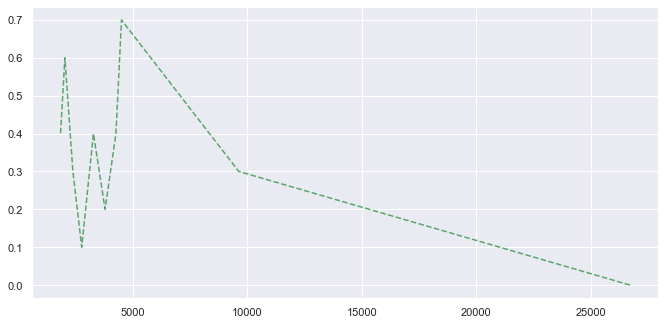

In [78]:
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(n_largest_data['Confirmed cases'],n_largest_data['Overall CCVI Index'],'g--')
plt.savefig('area of low')

The top 10 confirmed Covid cases in Nigeria have a relatively consistent trend over time, with occasional spikes and dips. This indicates that the outbreak is still ongoing in these states.

The overall community vulnerability index in Nigeria seems to have a negative correlation with the top 10 confirmed cases. The index appears to decrease as the number of confirmed cases increases, which suggests that states with higher vulnerability may require more resources and attention to help them manage the outbreak effectively. 

There is a significant variation in vulnerability across different states in Nigeria. Some states have a vulnerability index as high as 0.7, and as low as 0.1. This indicates that the outbreak is affecting different states in different ways and that some states may require more resources and attention than others.

#### Generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.

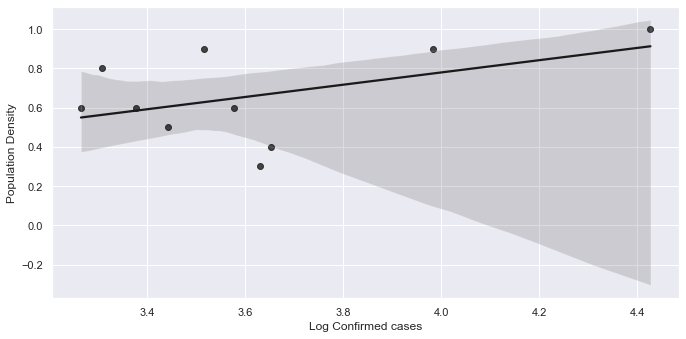

In [79]:
fig, ax = plt.subplots(figsize=(10,5))

# Define x and y variables
x = n_largest_data['Confirmed cases']
y = n_largest_data['Population Density']

# Apply log transformation to x
x_log = np.log10(x)

# Create regplot with log-transformed x-axis
sns.regplot(x_log, y, ax=ax, color='k')

# Set axis labels
ax.set_xlabel('Log Confirmed cases')
ax.set_ylabel('Population Density')

# Save the figure
plt.savefig('dense_log_x')

Here, we can observe that there is a positive correlation between the Confirmed cases and Population Density. As the Confirmed cases increase, so does the Population Density.

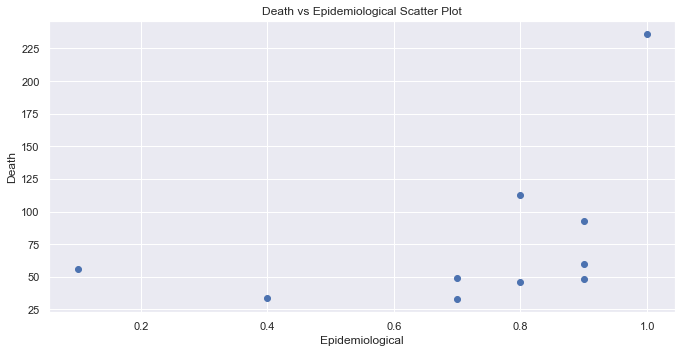

In [80]:
# Create a scatter plot with Death on the y-axis and Epidemiological on the x-axis
fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(n_largest_data['Epidemiological'], n_largest_data['Death'])

# Set the x-axis and y-axis labels
plt.xlabel('Epidemiological')
plt.ylabel('Death')

# Set the plot title
plt.title('Death vs Epidemiological Scatter Plot')

# Show the plot
plt.show()

States with higher epidemiological index are more likely to experience higher numbers of deaths due to the spread of disease.

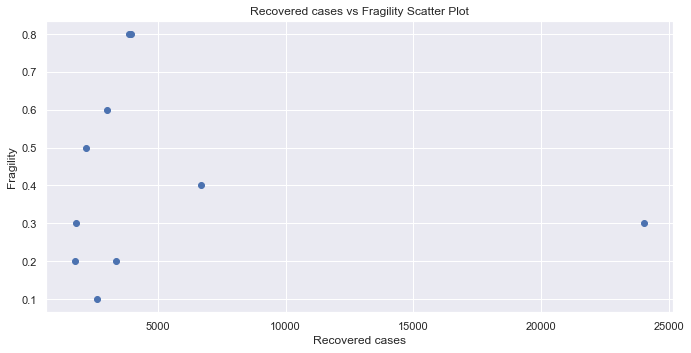

In [81]:
# Create a scatter plot with Fragility on the y-axis and Recovered cases on the x-axis
fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(n_largest_data['Recovered cases'], n_largest_data['Fragility'])

# Set the x-axis and y-axis labels
plt.xlabel('Recovered cases')
plt.ylabel('Fragility')

# Set the plot title
plt.title('Recovered cases vs Fragility Scatter Plot')

# Show the plot
plt.show()

## QUARTERLY GDP DATA ANALYSIS

#### Determine the effect of the Pandemic on the economy. Compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020):

In [82]:
url = "https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/raw/main/RealGDP.csv"
real_gdp_data = pd.read_csv(url)

In [83]:
real_gdp_data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [84]:
#  for mean
real_gdp_data[['Q1', 'Q2', 'Q3', 'Q4']].mean(axis=0)

Q1    1.607174e+07
Q2    1.635760e+07
Q3    1.788093e+07
Q4    1.600959e+07
dtype: float64

##### Average cummmulative gdp is highest at the third quarter

In [85]:
df = pd.DataFrame(real_gdp_data[['Q1', 'Q2', 'Q3', 'Q4']].mean(axis=0)).reset_index()

In [86]:
df['index'] = real_gdp_data['Year']

In [87]:
df.columns = ['Year', 'Total GDP']

In [88]:
df

,Year,Total GDP
0,2014,1.607174e+07
1,2015,1.635760e+07
2,2016,1.788093e+07
3,2017,1.600959e+07


##### The year with the highest total GDP was year 2016 and the lowest being 2017.

In [89]:
real_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [90]:
real_gdp_data['Year'] = real_gdp_data['Year'].astype('object')

In [91]:
real_gdp_data.describe()

,Q1,Q2,Q3,Q4
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


In [92]:
quarters=real_gdp_data.columns[1:]
quarters

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [93]:
# Reshape the data using melt
gdp = pd.melt(real_gdp_data, id_vars=['Year'], value_vars=['Q1', 'Q2', 'Q3', 'Q4'], var_name='Quarter', value_name='GDP')

In [94]:
gdp

,Year,Quarter,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [95]:
qt1=gdp[:7]
qt1

,Year,Quarter,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


In [96]:
qt2=gdp[7:14]
qt2

,Year,Quarter,GDP
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41
10,2017,Q2,16334719.27
11,2018,Q2,16580508.07
12,2019,Q2,16931434.89
13,2020,Q2,15890000.00


In [97]:
qt3=gdp[14:21]
qt3

,Year,Quarter,GDP
14,2014,Q3,17479127.58
15,2015,Q3,17976234.59
16,2016,Q3,17555441.69
17,2017,Q3,17760228.17
18,2018,Q3,18081342.10
19,2019,Q3,18494114.17
20,2020,Q3,17820000.00


In [98]:
qt4=gdp[21:]
qt4

,Year,Quarter,GDP
21,2014,Q4,18150356.45
22,2015,Q4,18533752.07
23,2016,Q4,18213537.29
24,2017,Q4,18598067.07
25,2018,Q4,19041437.59
26,2019,Q4,19530000.00
27,2020,Q4,0.00


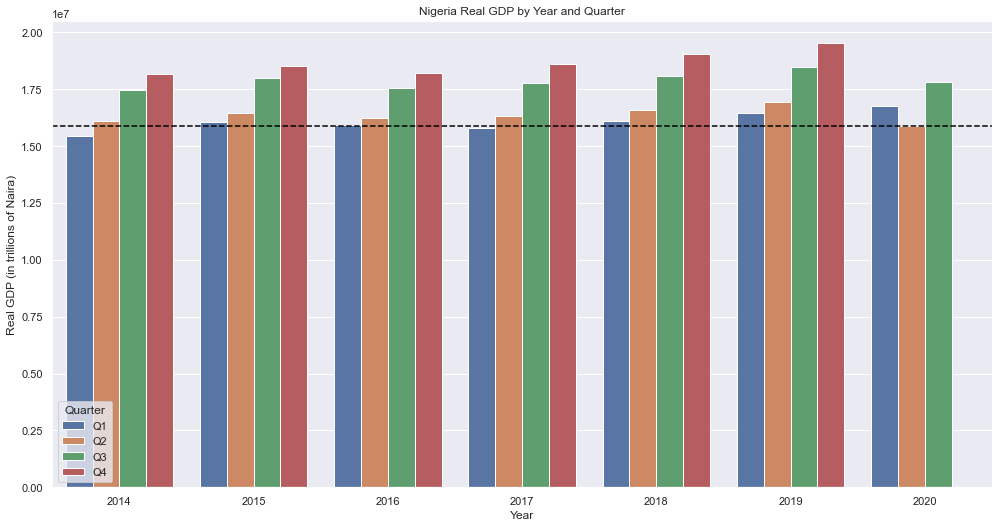

In [99]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='Year', y='GDP', hue='Quarter', data=gdp)

# Set legend location and title
plt.legend(loc='lower left', title='Quarter')

# Draw a horizontal line at the value of Q2 2020
plt.axhline(y=gdp.loc[(gdp['Year'] == 2020) & (gdp['Quarter'] == 'Q2'), 'GDP'].values[0], color='black', linestyle='--')

# Add plot and axis labels
plt.title('Nigeria Real GDP by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Real GDP (in trillions of Naira)')

# Save the plot to a file
plt.savefig('gdp_by_quarter')

# Show the plot
plt.show()

The barplot above shows the quarterly GDP values for each year from 2017 to 2020. We can observe that the GDP values generally increased from 2017 to 2019, with a slight decrease in Q2 and Q3 of 2017. However, there was a significant drop in GDP values in Q2 2020, likely due to the impact of the COVID-19 pandemic on the economy. The GDP values then started to increase again from Q3 2020.

The horizontal line drawn using 'axhline' represents the GDP value for Q2 2020, which is a clear outlier compared to the other quarters in the plot. This line helps to highlight the significant impact that the COVID-19 pandemic had on the Nigerian economy.

In [100]:
real_gdp_data[real_gdp_data['Year']==2020]['Q2']

6    15890000.0
Name: Q2, dtype: float64

### Budget Data Analysis
States across the country reduced their initial budget due to the impact of COVID-19 on the economy.

The data is to be used to determine the impact of COVID-19 on the economy.

In [101]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [102]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [103]:
budget_data.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [104]:
budget_data.isnull().sum()

states                 0
Initial_budget (Bn)    0
Revised_budget (Bn)    0
dtype: int64

In [105]:
budget_data['Percentage Change In Budget(%)']=(budget_data['Initial_budget (Bn)']-budget_data['Revised_budget (Bn)'])/(budget_data['Initial_budget (Bn)'])

In [106]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450
5,Bayelsa,242.18,183.15,0.243744
6,Benue,189.00,119.00,0.370370
7,Borno,146.80,108.80,0.258856
8,Cross River,1100.00,147.10,0.866273
9,Delta,395.50,282.30,0.286220


In [107]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   states                          37 non-null     object 
 1   Initial_budget (Bn)             37 non-null     float64
 2   Revised_budget (Bn)             37 non-null     float64
 3   Percentage Change In Budget(%)  37 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


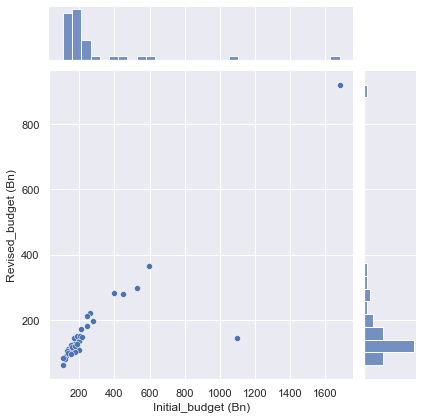

In [108]:
sns.jointplot(x='Initial_budget (Bn)',y='Revised_budget (Bn)',data=budget_data)

In [109]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450


<AxesSubplot:xlabel='states', ylabel='Initial_budget (Bn)'>

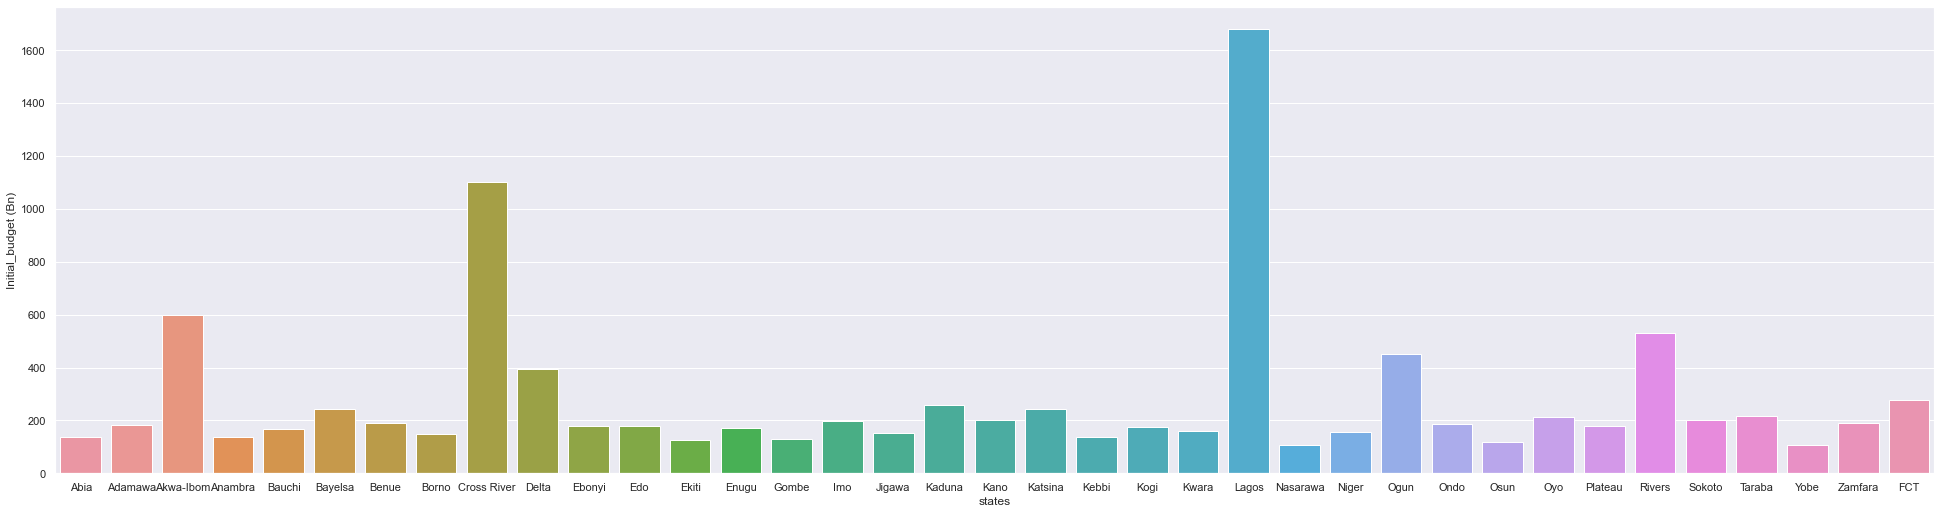

In [110]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Initial_budget (Bn)',data=budget_data)

<AxesSubplot:xlabel='states', ylabel='Revised_budget (Bn)'>

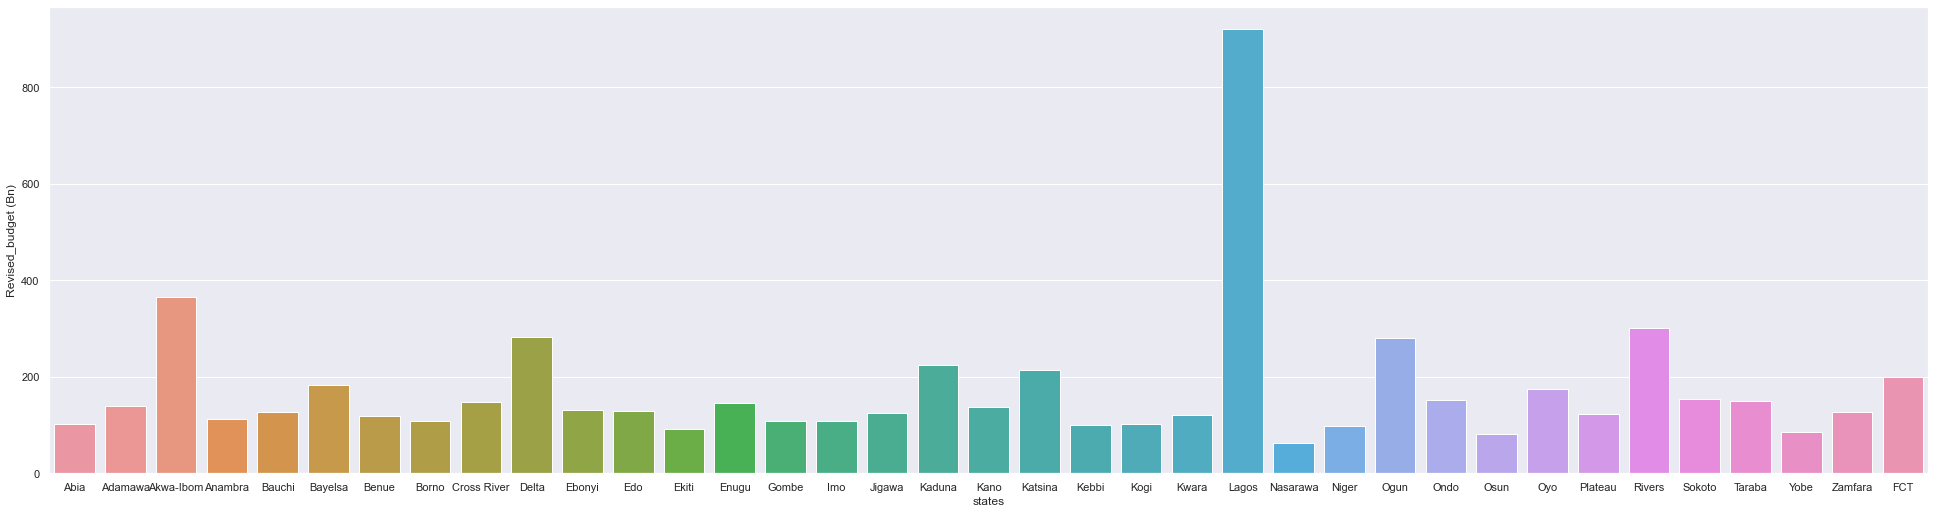

In [111]:
fig,ax=plt.subplots(figsize=(30,8))
sns.barplot(x='states',y='Revised_budget (Bn)',data=budget_data)


Lagos has the highest budget prior to the pandemic with 1.7trn and after the revised budget was released with 920bn

In [112]:
budget_data

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,0.248170
1,Adamawa,183.30,139.31,0.239989
2,Akwa-Ibom,597.73,366.00,0.387683
3,Anambra,137.10,112.80,0.177243
4,Bauchi,167.20,128.00,0.234450
5,Bayelsa,242.18,183.15,0.243744
6,Benue,189.00,119.00,0.370370
7,Borno,146.80,108.80,0.258856
8,Cross River,1100.00,147.10,0.866273
9,Delta,395.50,282.30,0.286220


In [113]:
budget_data['Percentage Change In Budget(%)'].mean()

0.29769165627276895

In [114]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].min()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
19,Katsina,244.0,213.0,0.127049


In [115]:
budget_data[budget_data['Percentage Change In Budget(%)']==budget_data['Percentage Change In Budget(%)'].max()]

,states,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
8,Cross River,1100.0,147.1,0.866273


The analysis from the initial and revised budget data shows that the average percentage budget drop in Nigeria across all states is approximately 30%

katsina had the lowest percentage change of about 13% from 344Bn to 213Bn

Cross River had the highest percentage change of about 87% from 1.1trn to 147bn